In [34]:
'''
This file implement an ANN-GARCH model that improves VIX forecasting
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.preprocessing import MinMaxScaler

In [4]:
# data preprocessing 
# collect variables and merge on index(date)
sp500_df = pd.read_csv('SPX.csv')
vix_df = pd.read_csv('^VIX.csv')
#vvix_df = pd.read_csv('^VVIX.csv')
dgs10_df= pd.read_csv('DGS10.csv')

In [5]:
sp500_df = sp500_df[['Date','Close']]
vix_df = vix_df[['Date','Adj Close']]
dgs10_df = dgs_df[[]'Date','Adj Close']]

In [6]:
sp500_df.rename(columns={'Close':'sp500'},inplace=True)
vix_df.rename(columns={'Adj Close':'vix'},inplace=True)

In [7]:
sp500_df=sp500_df[::-1]

In [8]:
vix_df['Date'] = pd.to_datetime(vix_df['Date'])
sp500_df['Date'] =pd.to_datetime(sp500_df['Date'])
delta = datetime.timedelta(days=50) # for rolling window later  
sub_df = sp500_df[sp500_df['Date']>= (datetime.datetime.strptime('2017-01-01','%Y-%m-%d') - delta )]

In [9]:
sub_df.set_index('Date',inplace=True)
vix_df.set_index('Date',inplace=True)

In [10]:
hist_std = sub_df['sp500'].rolling(window=30).std()
sub_df=sub_df.assign(hist_vol=hist_std)

In [11]:
sub_df.head(35)

,sp500,hist_vol
Date,,
2016-11-14,2164.20,NaN
2016-11-15,2180.39,NaN
2016-11-16,2176.94,NaN
2016-11-17,2187.12,NaN
2016-11-18,2181.90,NaN
2016-11-21,2198.18,NaN
2016-11-22,2202.94,NaN
2016-11-23,2204.72,NaN
2016-11-25,2213.35,NaN


In [12]:
vix_df.head()

,vix
Date,
2018-01-02,9.77
2018-01-03,9.15
2018-01-04,9.22
2018-01-05,9.22
2018-01-08,9.52


In [13]:
merged_df = pd.merge(sub_df,vix_df, how='inner', on='Date')

In [14]:
merged_df

,sp500,hist_vol,vix
Date,,,
2018-01-02,2695.81,34.661808,9.770000
2018-01-03,2713.06,34.066078,9.150000
2018-01-04,2723.99,33.790066,9.220000
2018-01-05,2743.15,35.419252,9.220000
2018-01-08,2747.71,36.536225,9.520000
...,...,...,...
2020-12-24,3703.06,51.140625,21.530001
2020-12-28,3735.36,48.728239,21.700001
2020-12-29,3727.04,48.388391,23.080000


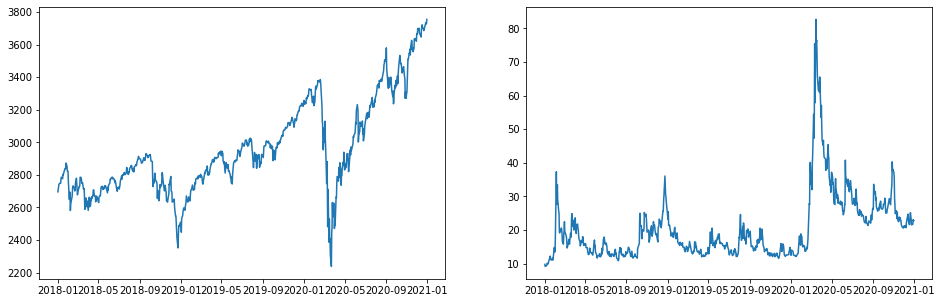

In [15]:
# plot
fig, axes = plt.subplots(1,2, figsize=(16,5))
axes[0].plot(merged_df['sp500'])
axes[1].plot(merged_df['vix'])
plt.show()

In [16]:
merged_df

,sp500,hist_vol,vix
Date,,,
2018-01-02,2695.81,34.661808,9.770000
2018-01-03,2713.06,34.066078,9.150000
2018-01-04,2723.99,33.790066,9.220000
2018-01-05,2743.15,35.419252,9.220000
2018-01-08,2747.71,36.536225,9.520000
...,...,...,...
2020-12-24,3703.06,51.140625,21.530001
2020-12-28,3735.36,48.728239,21.700001
2020-12-29,3727.04,48.388391,23.080000


In [17]:
spx_df = pd.read_csv('SPX.csv')
spx_df=spx_df[::-1]

In [18]:
spx_df['Date']=pd.to_datetime(spx_df['Date'])

In [19]:
delta = datetime.timedelta(days=30) # need 30 more days to calculate monthly volatility 
sub_df = spx_df[spx_df['Date']>= (datetime.datetime.strptime('2017-01-01','%Y-%m-%d') - delta )]

In [20]:
sub_df.loc['histotical std'] = sub_df['Close'].std()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [21]:
sub_df

,Date,Close,Volume,Open,High,Low
1210,2016-12-02 00:00:00,2191.950000,--,2191.120000,2197.950000,2188.370000
1209,2016-12-05 00:00:00,2204.710000,--,2200.650000,2209.420000,2199.970000
1208,2016-12-06 00:00:00,2212.230000,--,2207.260000,2212.780000,2202.210000
1207,2016-12-07 00:00:00,2241.350000,--,2210.720000,2241.630000,2208.930000
1206,2016-12-08 00:00:00,2246.190000,--,2241.130000,2251.690000,2237.570000
...,...,...,...,...,...,...
3,2021-09-21 00:00:00,4354.190000,--,4374.450000,4394.870000,4347.960000
2,2021-09-22 00:00:00,4395.640000,--,4367.430000,4416.750000,4367.430000
1,2021-09-23 00:00:00,4448.980000,--,4406.750000,4465.400000,4406.750000
0,2021-09-24 00:00:00,4455.480000,--,4438.040000,4463.120000,4430.270000


In [28]:
def series_to_supervised(data, col_names, n_in=1, dropnan=True ):
    """
    reshape time series dataframe into an aggragated dataframe with
    past values as features.

    :param data: dataframe
    :param col_names: list of column names
    :param n_in: lagged period
    :param dropnan: drop NA values. default to True
    :return: aggregated dataframe with past values as features/columns
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # shifted dataframe put horizontally
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += ['%s(t-%d)' % (col_name, i) for col_name in col_names]
    # concatenate and drop the invalid values due to shift
    cols.append(df)
    names += ['%s(t0)' % col_name for col_name in col_names]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [29]:
super_df= series_to_supervised(merged_df,merged_df.columns.tolist(),n_in=5)

In [31]:
super_df.head(5)
super_df.drop(['vix(t0)','sp500(t0)'],axis=1,inplace=True)


,sp500(t-5),hist_vol(t-5),vix(t-5),sp500(t-4),hist_vol(t-4),vix(t-4),sp500(t-3),hist_vol(t-3),vix(t-3),sp500(t-2),hist_vol(t-2),vix(t-2),sp500(t-1),hist_vol(t-1),vix(t-1),hist_vol(t0)
Date,,,,,,,,,,,,,,,,
2018-01-09,2695.81,34.661808,9.770000,2713.06,34.066078,9.150000,2723.99,33.790066,9.220000,2743.15,35.419252,9.220000,2747.71,36.536225,9.520000,37.534923
2018-01-10,2713.06,34.066078,9.150000,2723.99,33.790066,9.220000,2743.15,35.419252,9.220000,2747.71,36.536225,9.520000,2751.29,37.534923,10.080000,37.568244
2018-01-11,2723.99,33.790066,9.220000,2743.15,35.419252,9.220000,2747.71,36.536225,9.520000,2751.29,37.534923,10.080000,2748.23,37.568244,9.820000,39.814137
2018-01-12,2743.15,35.419252,9.220000,2747.71,36.536225,9.520000,2751.29,37.534923,10.080000,2748.23,37.568244,9.820000,2767.56,39.814137,9.880000,42.728409
2018-01-16,2747.71,36.536225,9.520000,2751.29,37.534923,10.080000,2748.23,37.568244,9.820000,2767.56,39.814137,9.880000,2786.24,42.728409,10.160000,45.037220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,3722.48,61.638054,21.930000,3709.41,59.676651,21.570000,3694.92,56.199470,25.160000,3687.26,54.480720,24.230000,3690.01,52.052026,23.309999,51.140625
2020-12-28,3709.41,59.676651,21.570000,3694.92,56.199470,25.160000,3687.26,54.480720,24.230000,3690.01,52.052026,23.309999,3703.06,51.140625,21.530001,48.728239
2020-12-29,3694.92,56.199470,25.160000,3687.26,54.480720,24.230000,3690.01,52.052026,23.309999,3703.06,51.140625,21.530001,3735.36,48.728239,21.700001,48.388391


In [88]:
def scale(dataset):
    '''

    :param dataset:  full data frame
    :return: nd array
    '''
    # scale data. This scaler takes 6 columns
    
    X,y = dataset.iloc[:,:-1],dataset.iloc[:,-1]
    
    #scaler = StandardScaler()
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_X = scaler.fit_transform(X)
    y=y.to_numpy()
    y = np.reshape(y, (y.shape[0],1))
    display(X.shape)
    display(y.shape)
    combined = np.concatenate((scaled_X, y),axis=1)
    combined_df = pd.DataFrame(combined, columns=dataset.columns)
    return combined_df, scaler

In [89]:
scaled_df,scaler = scale(super_df)

(751, 17)

(751, 1)

In [90]:
scaled_df

,sp500(t-5),hist_vol(t-5),vix(t-5),sp500(t-4),hist_vol(t-4),vix(t-4),sp500(t-3),hist_vol(t-3),vix(t-3),sp500(t-2),hist_vol(t-2),vix(t-2),sp500(t-1),hist_vol(t-1),vix(t-1),sp500(t0),hist_vol(t0),vix(t0)
0,0.308677,0.050580,0.008431,0.320293,0.048951,0.000000,0.324835,0.048197,0.000000,0.337626,0.052651,0.000000,0.340670,0.055704,0.000000,0.338382,0.058435,10.080000
1,0.320293,0.048951,0.000000,0.327652,0.048197,0.000952,0.337626,0.052651,0.000000,0.340670,0.055704,0.004083,0.343060,0.058435,0.007653,0.336367,0.058526,9.820000
2,0.327652,0.048197,0.000952,0.340554,0.052651,0.000952,0.340670,0.055704,0.004083,0.343060,0.058435,0.011705,0.341017,0.058526,0.004100,0.349095,0.064665,9.880000
3,0.340554,0.052651,0.000952,0.343625,0.055704,0.005031,0.343060,0.058435,0.011705,0.341017,0.058526,0.008167,0.353921,0.064665,0.004920,0.361395,0.072632,10.160000
4,0.343625,0.055704,0.005031,0.346035,0.058435,0.012646,0.341017,0.058526,0.008167,0.353921,0.064665,0.008983,0.366392,0.072632,0.008747,0.354929,0.078944,11.660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,1.000000,0.124328,0.173783,0.991199,0.118966,0.168888,0.973003,0.109460,0.216959,0.967890,0.104761,0.204301,0.969725,0.098121,0.188465,0.965094,0.095630,21.530001
747,0.991199,0.118966,0.168888,0.981442,0.109460,0.217705,0.967890,0.104761,0.204301,0.969725,0.098121,0.191779,0.978437,0.095630,0.164138,0.986363,0.089035,21.700001
748,0.981442,0.109460,0.217705,0.976284,0.104761,0.205058,0.969725,0.098121,0.191779,0.978437,0.095630,0.167551,1.000000,0.089035,0.166462,0.980885,0.088106,23.080000
749,0.976284,0.104761,0.205058,0.978136,0.098121,0.192548,0.978437,0.095630,0.167551,1.000000,0.089035,0.169865,0.994446,0.088106,0.185322,0.984177,0.091321,22.770000


In [ ]:
def rolling(scaled_data, n_train_start, pred_len=100, window_size=30):
    num_train = n_train_start-n_lag
    prediction = list()
    true_y = list()
    train_X, test_X, train_y, test_y = split(scaled_data, n_train_start)
    model = lstm(train_X.shape[1], train_X.shape[2], 64, 64, 0.1, 0.1)
    # len(scaled_data) - n_train_start
    #prediction_len = len(scaled_data-n_train_start-1)
    prediction_len = n_pred
    for i in range(prediction_len):
        print("the {}th iteration".format(i))
        train_X, test_X, train_y, test_y = split(scaled_data, num_train)  # 500
        train_X = train_X[num_train-window_size:]
        train_y = train_y[num_train-window_size:]
        test_X_sample = test_X[:1] # next sample in test X
        #model.fit(train_X, train_y, epochs=10, batch_size=32, verbose=0, shuffle=False)
        result=model.fit(train_X, train_y, epochs=10, batch_size=32, verbose=0, validation_data=(test_X,test_y),shuffle=False)
        y_hat = model.predict(test_X_sample)
        prediction.append(y_hat)
        true_y.append(test_y[:1])
        num_train += 1

        if i == prediction_len - 1:
            plt.figure()
            plt.plot(result.history['loss'], label='train')
            plt.plot(result.history['val_loss'], label='validation')
            plt.title("configs: layer1{} layer2{}".format(128, 196))
            plt.legend()
            plt.show()
    pred = np.array(prediction)
    pred = pred.reshape((prediction_len,))  # shape of predicted y sequence

    true_y = np.array(true_y)
    true_y = true_y.reshape((prediction_len,))  # shape of true y sequence

    # inverse scale
    X_padding = scaled_futures_data[:len(pred), :-1]
    pred=pred.reshape((len(pred), 1))
    inv_yhat = concatenate((pred, X_padding), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:, 0]

    true_y = true_y.reshape((len(true_y), 1))
    inv_true_y = concatenate((true_y, X_padding), axis=1)
    inv_true_y = scaler.inverse_transform(inv_true_y)
    inv_true_y = inv_true_y[:, 0]

    return inv_true_y, inv_yhat